### 1. 

En el archivo "logistic_regression_digits" hemos visto un ejemplo multiclase. Elimina todas las imágenes y etiqueta (label) cuyo valor del label no sea 1 o 9. Es decir, elimina todos los dígitos y quédate solo con los dígitos 1 y 9.

Ahora, realiza un entrenamiento con logistic regression con los nuevos datos:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (modifica, prueba) los argumentos y comenta si modificando algunas de ellas se mejora el porcentaje de acierto del problema (probar al menos 2 diferentes)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
# Imports 

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import math
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
df = pd.DataFrame(data= np.c_[digits['data'], digits['target']])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [3]:
# Let's filter the data
values = [1,9]
filtered_df = df[df[64].isin(values)]
filtered_df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9.0
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1.0
19,0.0,0.0,6.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,7.0,16.0,16.0,13.0,11.0,1.0,9.0
21,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,0.0,0.0,5.0,14.0,11.0,8.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,7.0,15.0,12.0,5.0,0.0,0.0,9.0
1774,0.0,0.0,6.0,12.0,12.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.0,10.0,4.0,0.0,0.0,1.0
1786,0.0,0.0,4.0,14.0,15.0,6.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,4.0,13.0,15.0,9.0,0.0,0.0,9.0
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0


In [4]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.15, random_state=0)

In [5]:
X = filtered_df.loc[:, :63]
y = filtered_df.loc[:, 64]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [7]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (307, 64)
X_test shape: (55, 64)
y_train shape: (307,)
y_test shape: (55,)


In [8]:
# Model training

from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [9]:
print("Test data score:", logisticRegr.score(x_train, y_train))
print("Train data score:", logisticRegr.score(x_test, y_test))

Test data score: 1.0
Train data score: 1.0


### ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

Si mejora, porque ahora tienen muchas menos opciones. Es decir, más probabilidad de acertar cada acierto. Además, no necesita identificar tantos patrones ya que no hay tantos posibles outcomes que predecir.

In [10]:
def to_test(df, penalty, intercept):
    X = filtered_df.loc[:, :63]
    y = filtered_df.loc[:, 64]

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

    # Parameters to iterate over
    seeds = random.sample(range(1, 10000), 4)
    iterations = list(range(50, 350, 50))

    d = {}
    d2 = {}

    for seed in seeds:
        for iteration in iterations:
            # Model
            logisticRegr = LogisticRegression(penalty = penalty, random_state = seed, max_iter = iteration, n_jobs = -1)

            # Training
            logisticRegr.fit(x_train, y_train)

            train_score = logisticRegr.score(x_train, y_train)
            test_score = logisticRegr.score(x_test, y_test)

            d2[iteration] = {"train_score": train_score, "test_score": test_score}

        d[seed] = d2

    # I'll transform the dict into a dataframe
    scores = pd.DataFrame(d).stack().reset_index()
    scores.columns = ["iterations", "seeds", "results"]
    scores["train_score"] = scores["results"].apply(lambda x: x["train_score"])
    scores["test_score"] = scores["results"].apply(lambda x: x["test_score"])

    return scores

In [11]:
def plot(scores, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8), sharex = True)

    sns.scatterplot(x = scores["seeds"], y = scores["train_score"], hue = scores["iterations"], s = 100, ax = ax1)
    sns.scatterplot(x = scores["seeds"], y = scores["test_score"], hue = scores["iterations"], s = 100, ax = ax2)

    fig.suptitle(title)

    ax1.set_title("train_score")
    ax2.set_title("test_score")

    return fig

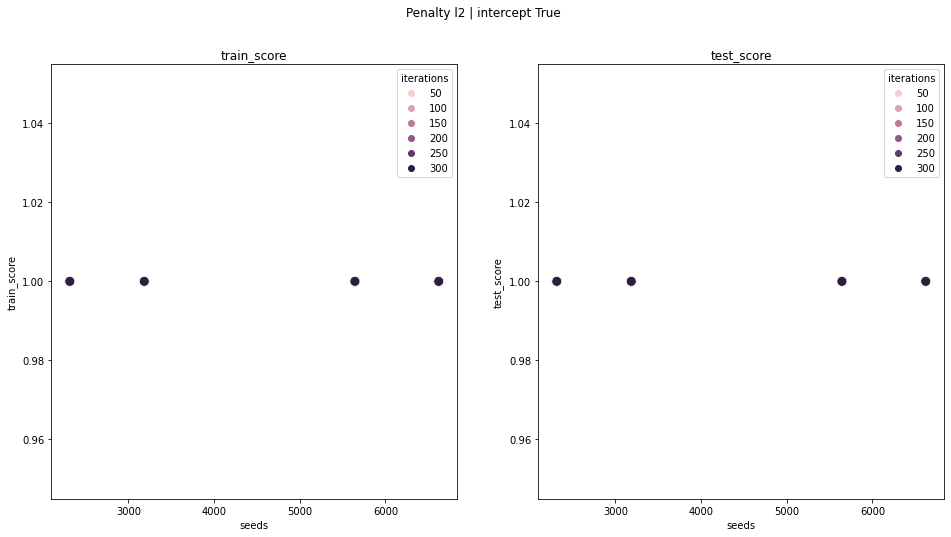

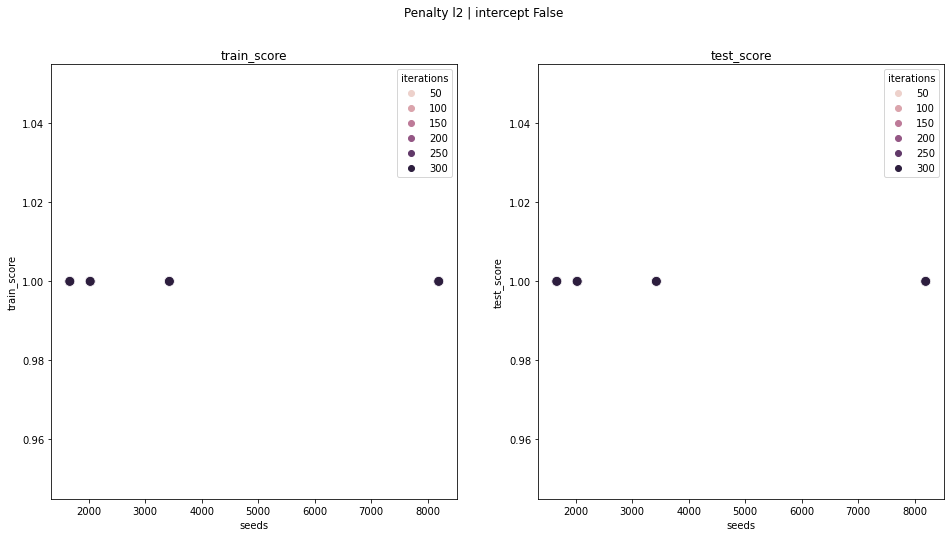

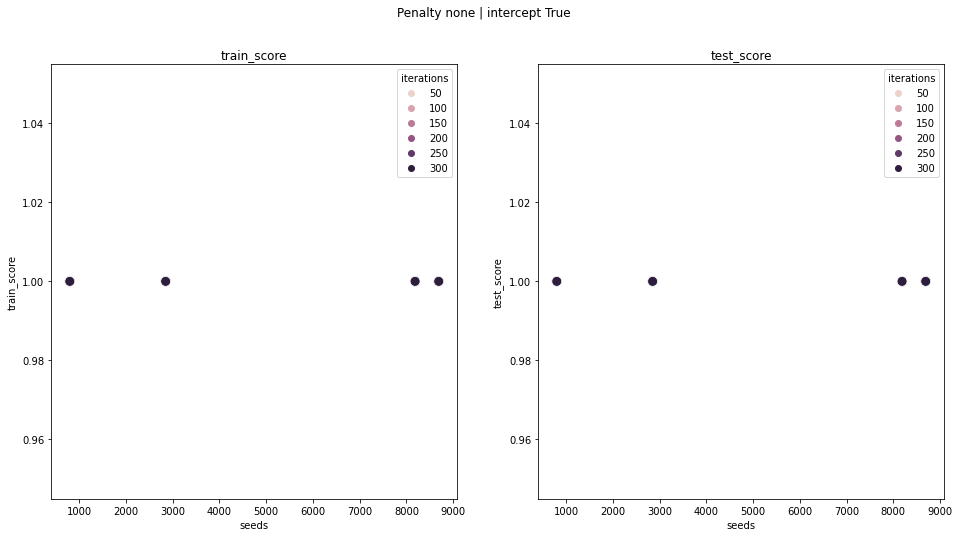

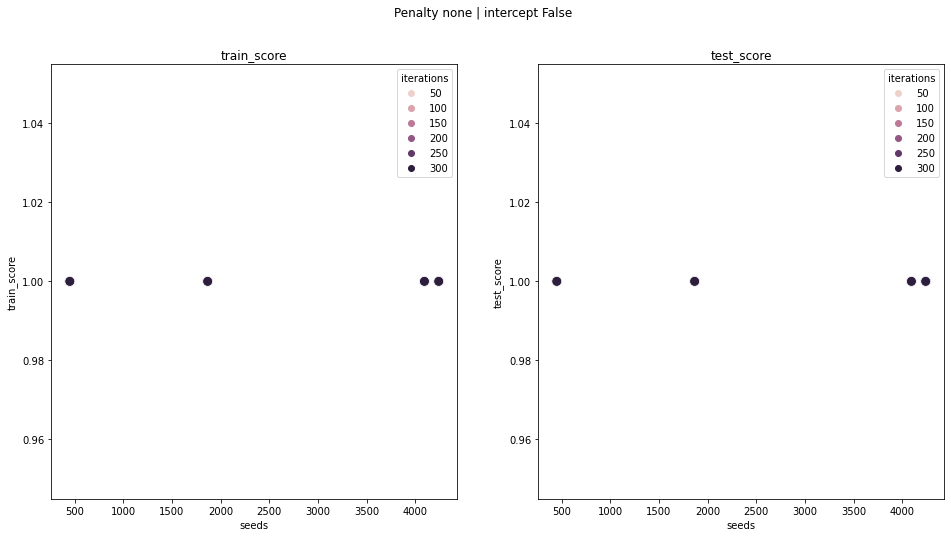

In [12]:
penalties = ["l2", "none"]
intercept = [True, False]

for penalty in penalties:
    for inter in intercept:
        scores = to_test(filtered_df, penalty, intercept)
        plot(scores, f"Penalty {penalty} | intercept {inter}")
        plt.show()

Podemos ver que el score de este modelo que ya estaba en 1 no varía, lo cual tiene sentido ya que por un lado la muestra es pequeña, por lo que eso no da mucho margen, y por otro, el score ya estaba al máximo.